In [2]:
using JLD2
using FourierFlows
using CairoMakie
using StatsBase
using Printf
include("../AnalysisUtils.jl")

mapfilter_snapshots (generic function with 1 method)

In [117]:
function load_ω(run_directory)

end

# run_directory = "/scratch/nad9961/swqg/434573/1/"
# run_directory = "/scratch/nad9961/swqg/275197/2/"
# run_directory = "/scratch/nad9961/swqg/688017/3"

#run_directory = "/scratch/nad9961/swqg/3238248/1/"
#run_directory = "/scratch/nad9961/swqg/3238248/2/"
run_directory0 = "/scratch/nad9961/swqg/3288403/1/"
run_directory3 = "/scratch/nad9961/swqg/3288403/5/"
run_directory2 = "/scratch/nad9961/swqg/3288403/8/"
run_directory = "/scratch/nad9961/swqg/3288403/9/"
Nsnapshots = count_snapshots(run_directory)
Nsnapshots2 = count_snapshots(run_directory2)
Nsnapshots3 = count_snapshots(run_directory3)
f, Cg, _ = read_parameters(run_directory)
t, x, k0, u0 = load_snapshot(run_directory0, 2)
t2, x, k2, u2 = load_snapshot(run_directory2, Nsnapshots2)
#t, x, k2, u = load_snapshot(run_directory, 2)
t1, x, k1, u1 = load_snapshot(run_directory, Nsnapshots)
t3, x, k3, u3 = load_snapshot(run_directory3, Nsnapshots3)
ω0 = sqrt.(f^2 .+ Cg^2 * (k0[:,1].^2 + k0[:,2].^2))
ω1 = sqrt.(f^2 .+ Cg^2 * (k1[:,1].^2 + k1[:,2].^2))
ω2 = sqrt.(f^2 .+ Cg^2 * (k2[:,1].^2 + k2[:,2].^2))
ω3 = sqrt.(f^2 .+ Cg^2 * (k3[:,1].^2 + k3[:,2].^2))
println(maximum(ω2))
u_rms1 = sqrt.(sum(u1.^2)/size(u1,1) / Cg)
u_rms2 = sqrt.(sum(u2.^2)/size(u2,1) / Cg)
u_rms3 = sqrt.(sum(u3.^2)/size(u3,1) / Cg)
println(u_rms1)
println(u_rms2)

324.39464054219513
0.5384822
0.31655532


In [118]:
function moving_average(A::AbstractArray, m::Int)
    out = similar(A)
    R = CartesianIndices(A)
    Ifirst, Ilast = first(R), last(R)
    I1 = m÷2 * oneunit(Ifirst)
    for I in R
        n, s = 0, zero(eltype(out))
        for J in max(Ifirst, I-I1):min(Ilast, I+I1)
            s += A[J]
            n += 1
        end
        out[I] = s/n
    end
    return out
end

moving_average (generic function with 1 method)

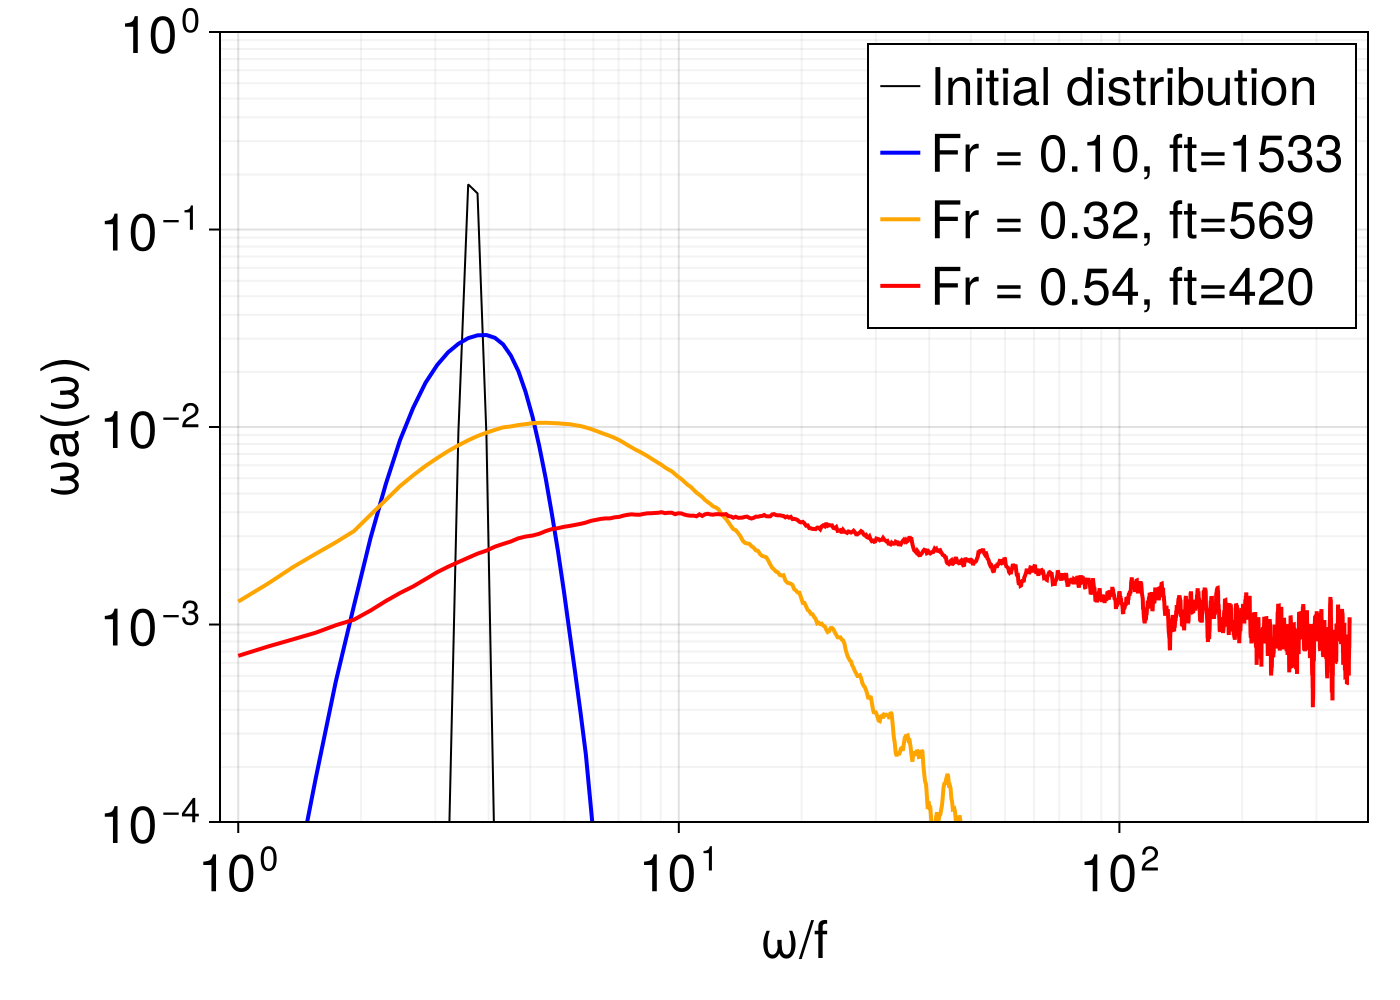

In [137]:
fig = Figure(fontsize=26, size=(700, 500), fontfamily="Arial")
ω_min = 1
ω_max = 1000/f

#bin_edges = @. exp(log(ω_min) + (log(ω_max/ω_min)*(0:(Nbins-1))/(Nbins-1)))
#bin_size = diff(exp.((0:(Nbins))/Nbins * log(ω_max / ω_min) ) * ω_min)
#index_function(ω) = exponential_array_index(ω, ω_min, ω_max, Nbins)

initial_action = 0.1 / size(u, 1)
Nbins = 2000
bin_edges = @. ω_min .+ (ω_max - ω_min) * (0:Nbins)/Nbins
#println(bin_edges)

ax = Axis(fig[1,1]; xscale=log10, yscale=log10, limits=((ω_min/1.1, 1.1*ω_max), (1e-4, 1e0)),
    xlabel = "ω/f", ylabel="ωa(ω)",
    xminorgridvisible=true,
    xminorticks=IntervalsBetween(10),
    yminorgridvisible=true,
    yminorticks=IntervalsBetween(10))
hist0 = fit(Histogram, ω0/f, bin_edges, closed=:left)
hist1 = fit(Histogram, ω1/f, bin_edges, closed=:left)
hist2 = fit(Histogram, ω2/f, bin_edges, closed=:left)
hist3 = fit(Histogram, ω3/f, bin_edges, closed=:left)

lines!(ax, hist0.edges[1][1:end-1], initial_action * hist0.weights .* hist0.edges[1][1:end-1], color=:black, label="Initial distribution", linewidth=1)
lines!(ax, hist3.edges[1][1:end-1], moving_average(initial_action * hist3.weights .* hist3.edges[1][1:end-1], 10), color=:blue, label=@sprintf("Fr = %0.2f, ft=%0.0f", u_rms3, f*t3), linewidth=2)
lines!(ax, hist2.edges[1][1:end-1], moving_average(initial_action * hist2.weights .* hist2.edges[1][1:end-1], 10), color=:orange, label=@sprintf("Fr = %0.2f, ft=%0.0f", u_rms2, f*t2), linewidth=2)
lines!(ax, hist1.edges[1][1:end-1], moving_average(initial_action * hist1.weights .* hist1.edges[1][1:end-1], 10), color=:red, label=@sprintf("Fr = %0.2f, ft=%0.0f", u_rms1, f*t1), linewidth=2)
axislegend(ax, position=:rt)
save("images/frequency_spreading.eps", fig)
#lines!(ax, bin_edges[10:end], 3e4*(bin_edges[10:end]).^(-1))

fig

In [32]:
sqrt.(sum(u.^2)/size(u, 1))/Cg

0.28054398f0

In [25]:
hist2.weights

2000-element Vector{Int64}:
 65536
     0
     0
     0
     0
     0
     0
     0
     0
     0
     0
     0
     0
     ⋮
     0
     0
     0
     0
     0
     0
     0
     0
     0
     0
     0
     0